In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
#curl https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt?dl=1 -o "C:\Users\sonia\OneDrive\Desktop\LaboratoryOfComputationalPhysics_Y6\data_000637.txt"

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
N = 10000
df = pd.read_csv('data_000637.txt', nrows = N)
print(df.head())
#df.describe() mi da anche info tipo media, st dev etc

   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
max_bx_counter = df['BX_COUNTER'].max() #prendo df e cerco il max nella colonna "BX_COUNTER".
num_bx_in_orbit = max_bx_counter + 1 #il max sarà max + 1
print(f'The number of BX in an ORBIT is: {num_bx_in_orbit}') #l'f all'inizio mi fa stampare una stringa

The number of BX in an ORBIT is: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
df_full = pd.read_csv('data_000637.txt')
max_orbit = df_full['ORBIT_CNT'].max() #valore max dell'orbit_cnt
min_orbit = df_full['ORBIT_CNT'].min() #valore min
duration_orbits = max_orbit - min_orbit + 1 #durata in orbits
duration_bx = duration_orbits * num_bx_in_orbit #calcolo la durata in bx
duration_ns = duration_bx * 25 #converto in ns dato che un bx sono 25 nanosecondi
duration_seconds = duration_ns / 1e9
print(f'Data taking lasted: {duration_seconds} seconds')

Data taking lasted: 0.9805455 seconds


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
df['ABS_T'] = (df['TDC_MEAS']*25/30)+(df['BX_COUNTER']*25)+(df['ORBIT_CNT']*num_bx_in_orbit*25) 
#per aggiungere una colonna alla fine creo con df[]. poi in questo caso faccio la somma delle 3
#colonne ricordando di convertire in nanosecondi
#df = df.drop(columns=['absolute_time_ns']) in caso volessi cancellare una colonna
print(df.head())

   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS         ABS_T
0     1     0          123  3869200167        2374        26  3.447457e+14
1     1     0          124  3869200167        2374        27  3.447457e+14
2     1     0           63  3869200167        2553        28  3.447457e+14
3     1     0           64  3869200167        2558        19  3.447457e+14
4     1     0           64  3869200167        2760        25  3.447457e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
df['HEAD'] = np.random.choice([0,1], size = len(df)) #np.random.choice([valori ammessi], numero di
#righe da modificare)
print(df.head())

   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS         ABS_T
0     0     0          123  3869200167        2374        26  3.447457e+14
1     0     0          124  3869200167        2374        27  3.447457e+14
2     0     0           63  3869200167        2553        28  3.447457e+14
3     1     0           64  3869200167        2558        19  3.447457e+14
4     1     0           64  3869200167        2760        25  3.447457e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
df_head_1 = df[df['HEAD'] == 1] #creo un df nuovo che copia il df precedente prendendo però solo
#le righe dove df['HEAD'] == 1
print(df_head_1.head())

    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS         ABS_T
3      1     0           64  3869200167        2558        19  3.447457e+14
4      1     0           64  3869200167        2760        25  3.447457e+14
7      1     0          139  3869200167        2776         0  3.447457e+14
9      1     0           60  3869200167        2788         7  3.447457e+14
11     1     0           64  3869200167        2786        19  3.447457e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

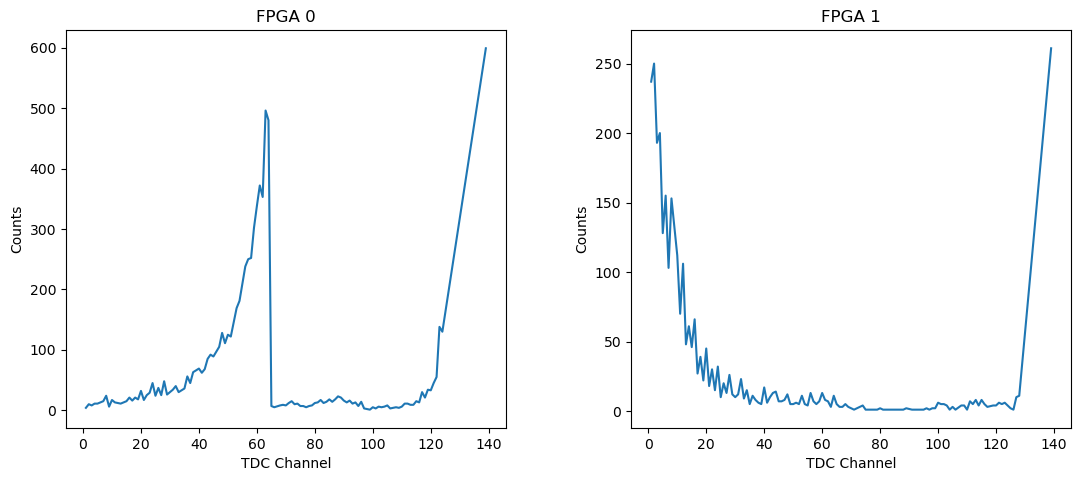

In [21]:
# ho due valori di FPGA (0 e 1)
df_fpga0 = df[df['FPGA']==0] #creo un df con FPGA == 0
df_fpga1 = df[df['FPGA']==1] #creo un df con FPGA == 1
grouped_0 = df_fpga0.groupby('TDC_CHANNEL', dropna=False) #raggruppo con TDC_CHANNEL 
grouped_1 = df_fpga1.groupby('TDC_CHANNEL', dropna=False) #e non escludo i valori NaN
counts_0 = grouped_0.count() #conta quanti valori ci sono
#print(counts_0)
counts_1 = grouped_1.count()
#print(counts_1)

figure, axis = plt.subplots(1, 2) #una figura con 2 "axis", ovvero due figure in una
figure.set_figwidth(12) #larghezza 
figure.set_figheight(6) #altezza 
#setto la prima delle due figure
axis[0].plot(counts_0.axes[0], counts_0['FPGA']) 
axis[0].set_title("FPGA 0") 
axis[0].set_xlabel("TDC Channel")
axis[0].set_ylabel("Counts")
#ora la seconda figura
axis[1].plot(counts_1.axes[0], counts_1['FPGA'])
axis[1].set_title("FPGA 1") 
axis[1].set_xlabel("TDC Channel")
axis[1].set_ylabel("Counts")
figure.tight_layout(pad=5.0) #le metto attaccate

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [25]:
def print_noisy_channels(grouped_data, group_label, top_n=3):
    # Calcola i conteggi, ordina in modo decrescente e prendi i primi 'top_n' elementi
    noisy_channels = grouped_data['HEAD'].count().nlargest(top_n)
    print(f"FPGA_{group_label} - Top {top_n} Noisy Channels")
    for channel, count in noisy_channels.items():
        print(f"TDC channel {channel} = {count}")
    print()

print_noisy_channels(grouped_0, 0)
print_noisy_channels(grouped_1, 1)

FPGA_0 - Top 3 Noisy Channels
TDC channel 139 = 599
TDC channel 63 = 496
TDC channel 64 = 480

FPGA_1 - Top 3 Noisy Channels
TDC channel 139 = 261
TDC channel 2 = 250
TDC channel 1 = 237



9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
n_of_unique_orbits = df_full['ORBIT_CNT'].nunique() #unici in tutto il dataset
print(f"Number of unique orbits: {n_of_unique_orbits}")

n_uniq_139 = df_full[df_full['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()
print(f"Number of unique orbits with at least one meas from TDC_CHANNEL=139: {n_uniq_139}")

NameError: name 'df_full' is not defined